In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.style.use("science")

In [2]:
## baseline sensitivity:
def read(model, cha, E, T):

    deltaT_dataNO_pdfNO, deltaT_dataNO_pdfIO, deltaT_dataIO_pdfNO, deltaT_dataIO_pdfIO = [], [], [], []
    sens_dataNO, sens_dataIO = [], []
    for i in range(10):
        df1 = pd.read_csv(f"/junofs/users/miaoyu/supernova/analysis/MH_new/results/{model}_10kpc_NO_{cha}_{E:.2f}MeV_fitTmax{T}ms_fileNo{i}.csv")
        df2 = pd.read_csv(f"/junofs/users/miaoyu/supernova/analysis/MH_new/results/{model}_10kpc_IO_{cha}_{E:.2f}MeV_fitTmax{T}ms_fileNo{i}.csv")

        tmp_deltaT_dataNO_pdfNO = df1["TbestNO"]
        tmp_deltaT_dataNO_pdfIO = df1["TbestIO"]
        tmp_sens_dataNO = df1["sens"]

        tmp_deltaT_dataIO_pdfNO = df2["TbestNO"]
        tmp_deltaT_dataIO_pdfIO = df2["TbestIO"]
        tmp_sens_dataIO = df2["sens"]

        for a, b, c, d, e, f in zip(tmp_deltaT_dataNO_pdfNO, tmp_deltaT_dataNO_pdfIO, tmp_sens_dataNO, tmp_deltaT_dataIO_pdfNO, tmp_deltaT_dataIO_pdfIO, tmp_sens_dataIO):
            deltaT_dataNO_pdfNO.append(a)
            deltaT_dataNO_pdfIO.append(b)
            sens_dataNO.append(c)
            deltaT_dataIO_pdfNO.append(d)
            deltaT_dataIO_pdfIO.append(e)
            sens_dataIO.append(f)

    deltaT_dataNO_pdfNO = np.array(deltaT_dataNO_pdfNO)
    deltaT_dataNO_pdfIO = np.array(deltaT_dataNO_pdfIO)
    sens_dataNO = np.array(sens_dataNO)
    deltaT_dataIO_pdfNO = np.array(deltaT_dataIO_pdfNO)
    deltaT_dataIO_pdfIO = np.array(deltaT_dataIO_pdfIO)
    sens_dataIO = np.array(sens_dataIO)

    return deltaT_dataNO_pdfNO, deltaT_dataNO_pdfIO, sens_dataNO, deltaT_dataIO_pdfNO, deltaT_dataIO_pdfIO, sens_dataIO 



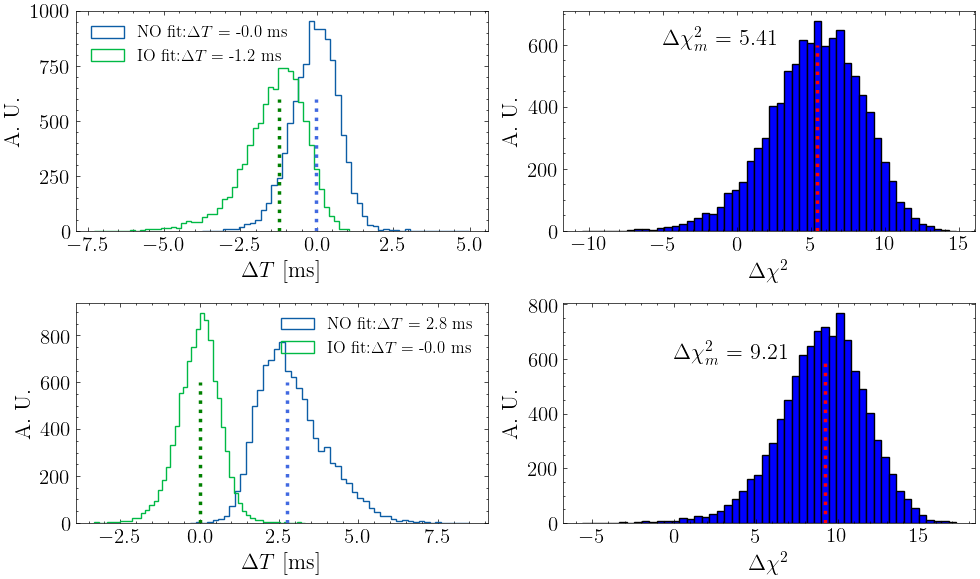

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax[0, 0].hist(deltaT_dataNO_pdfNO, bins=50, histtype="step", label="NO fit:"+r"$\Delta T$ = %.1f ms"%np.median(deltaT_dataNO_pdfNO))
ax[0, 0].hist(deltaT_dataNO_pdfIO, bins=50, histtype="step", label="IO fit:"+r"$\Delta T$ = %.1f ms"%np.median(deltaT_dataNO_pdfIO))
ax[0, 0].set_xlabel(r"$\Delta T$ [ms]", fontsize=16)
ax[0, 0].set_ylabel("A. U.", fontsize=16)
ax[0, 0].legend(loc="upper left", prop={"size":12})
ax[0, 0].tick_params(axis="both", labelsize=15)
ax[0, 0].vlines(np.median(deltaT_dataNO_pdfNO), 0, 600, color="royalblue", linestyle=":", lw=2.5)
ax[0, 0].vlines(np.median(deltaT_dataNO_pdfIO), 0, 600, color="green", linestyle=":", lw=2.5)
ax[0, 1].hist(sens_dataNO, bins=50, color="blue", edgecolor="black")
ax[0, 1].set_xlabel(r"$\Delta \chi^2$", fontsize=16)
ax[0, 1].set_ylabel("A. U.", fontsize=16)
ax[0, 1].tick_params(axis="both", labelsize=15)
ax[0, 1].vlines(np.median(sens_dataNO), 0, 600, linestyle=":", lw=2.5, color="red")
ax[0, 1].text( -5, 600, r"$\Delta \chi^2_m$ = %.2f"%np.median(sens_dataNO), fontsize=16)

ax[1, 0].hist(deltaT_dataIO_pdfNO, bins=50,histtype="step", label="NO fit:"+r"$\Delta T$ = %.1f ms"%np.median(deltaT_dataIO_pdfNO))
ax[1, 0].hist(deltaT_dataIO_pdfIO, bins=50,histtype="step", label="IO fit:"+r"$\Delta T$ = %.1f ms"%np.median(deltaT_dataIO_pdfIO))
ax[1, 0].set_xlabel(r"$\Delta T$ [ms]", fontsize=16)
ax[1, 0].set_ylabel("A. U.", fontsize=16)
ax[1, 0].tick_params(axis="both", labelsize=15)
ax[1, 0].legend(loc="upper right", prop={"size":12})
ax[1, 1].hist(sens_dataIO, bins=50, color="blue", edgecolor="black")
ax[1, 1].set_xlabel(r"$\Delta \chi^2$", fontsize=16)
ax[1, 1].set_ylabel("A. U.", fontsize=16)
ax[1, 1].tick_params(axis="both", labelsize=15)
ax[1, 1].vlines(np.median(sens_dataIO), 0, 600, linestyle=":", lw=2.5, color="red")
ax[1, 1].text(0, 600, r"$\Delta\chi^2_m$ = %.2f"%np.median(sens_dataIO), fontsize=16)
ax[1, 0].vlines(np.median(deltaT_dataIO_pdfNO), 0, 600, color="royalblue", linestyle=":", lw=2.5)
ax[1, 0].vlines(np.median(deltaT_dataIO_pdfIO), 0, 600, color="green", linestyle=":", lw=2.5)

plt.tight_layout()
#plt.savefig("Garching82503_Ethr0.15MeV_3channels_10ms50ms.pdf")
plt.show()


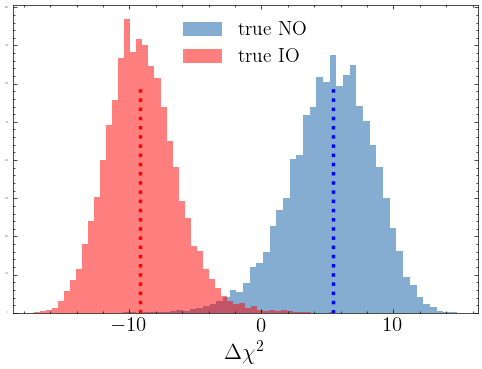

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(sens_dataNO,  bins=50, alpha=0.5, label="true NO")
ax.hist(-sens_dataIO, bins=50, alpha=0.5, label="true IO", color="red")
ax.set_xlabel(r"$\Delta\chi^2$", fontsize=16)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=0)
ax.legend(prop={"size":14})
ax.vlines(-np.median(sens_dataIO), 0, 600, linestyle=":", lw=2.5, color="red")
ax.vlines(np.median(sens_dataNO),  0, 600, linestyle=":", lw=2.5, color="blue")

In [6]:
deltaT_dataNO_pdfNO_m, deltaT_dataNO_pdfIO_m, sens_dataNO_m, deltaT_dataIO_pdfNO_m, deltaT_dataIO_pdfIO_m, sens_dataIO_m = [[] for i in range(5)], [[] for i in range(5)], [[] for i in range(5)], [[] for i in range(5)], [[] for i in range(5)], [[] for i in range(5)] 

tarr = np.array([40, 45, 50, 55, 60])

for i, tmax in enumerate(tarr):
    for model in [81123, 82503, 82703, 84003, 91123, 92503, 92703, 94003,]:
        model = "Garching" + str(model)

        deltaT_dataNO_pdfNO, deltaT_dataNO_pdfIO, sens_dataNO, deltaT_dataIO_pdfNO, deltaT_dataIO_pdfIO, sens_dataIO  = read(model, "pESeESIBD", 0.15, tmax)

        deltaT_dataNO_pdfNO_m[i].append(np.median(deltaT_dataNO_pdfNO))
        deltaT_dataNO_pdfIO_m[i].append(np.median(deltaT_dataNO_pdfIO))
        sens_dataNO_m[i].append(np.median(sens_dataNO))
        deltaT_dataIO_pdfNO_m[i].append(np.median(deltaT_dataIO_pdfNO))
        deltaT_dataIO_pdfIO_m[i].append(np.median(deltaT_dataIO_pdfIO))
        sens_dataIO_m[i].append(np.median(sens_dataIO))


    for model in [12, 14, 16, 18, 20, 22, 25, 26]:
        model = "Burrows" + str(model)

        deltaT_dataNO_pdfNO, deltaT_dataNO_pdfIO, sens_dataNO, deltaT_dataIO_pdfNO, deltaT_dataIO_pdfIO, sens_dataIO  = read(model, "pESeESIBD", 0.15, tmax)

        deltaT_dataNO_pdfNO_m[i].append(np.median(deltaT_dataNO_pdfNO))
        deltaT_dataNO_pdfIO_m[i].append(np.median(deltaT_dataNO_pdfIO))
        sens_dataNO_m[i].append(np.median(sens_dataNO))
        deltaT_dataIO_pdfNO_m[i].append(np.median(deltaT_dataIO_pdfNO))
        deltaT_dataIO_pdfIO_m[i].append(np.median(deltaT_dataIO_pdfIO))
        sens_dataIO_m[i].append(np.median(sens_dataIO))

deltaT_dataNO_pdfNO_m = np.array(deltaT_dataNO_pdfNO_m)
deltaT_dataNO_pdfIO_m = np.array(deltaT_dataNO_pdfIO_m)
sens_dataNO_m = np.array(sens_dataNO_m)
deltaT_dataIO_pdfNO_m = np.array(deltaT_dataIO_pdfNO_m)
deltaT_dataIO_pdfIO_m = np.array(deltaT_dataIO_pdfIO_m)
sens_dataIO_m = np.array(sens_dataIO_m)

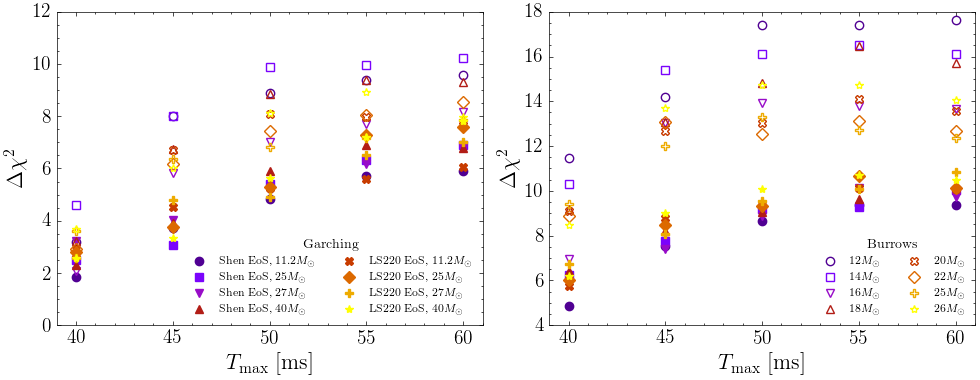

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ms = ["o", "s", "v", "^", "X", "D", "P", "*"]
colors0 = mpl.cm.gnuplot(np.linspace(0.1,1, 8))
labels1 = [r"Shen EoS, $11.2M_\odot$", r"Shen EoS, $25M_\odot$",r"Shen EoS, $27M_\odot$",r"Shen EoS, $40M_\odot$", r"LS220 EoS, $11.2M_\odot$", r"LS220 EoS, $25M_\odot$",r"LS220 EoS, $27M_\odot$",r"LS220 EoS, $40M_\odot$"]
labels2 = [r"$12M_\odot$", r"$14M_\odot$",r"$16M_\odot$",r"$18M_\odot$",r"$20M_\odot$",r"$22M_\odot$",r"$25M_\odot$",r"$26M_\odot$",]

for i in range(8):
    ax[0].plot(tarr, sens_dataNO_m[:, i],   ms[i], color=colors0[i], label=labels1[i])
    ax[0].plot(tarr, sens_dataNO_m[:, i+8], ms[i], color=colors0[i], fillstyle="none")
    
    ax[1].plot(tarr, sens_dataIO_m[:, i],   ms[i], color=colors0[i], )
    ax[1].plot(tarr, sens_dataIO_m[:, i+8], ms[i], color=colors0[i], label=labels2[i], fillstyle="none")


ax[0].set_xlabel(r"$T_\mathrm{max}$ [ms]", fontsize=16)
ax[0].set_ylabel(r"$\Delta\chi^2$", fontsize=16)
ax[0].tick_params(axis="both", labelsize=14)
ax[0].legend(ncol=2, prop={"size":8}, title="Garching")
ax[0].set_ylim(0, 12)
ax[1].set_xlabel(r"$T_\mathrm{max}$ [ms]", fontsize=16)
ax[1].set_ylabel(r"$\Delta\chi^2$", fontsize=16)
ax[1].tick_params(axis="both", labelsize=14)
ax[1].legend(ncol=2, prop={"size":8}, title="Burrows")
ax[1].set_ylim(4, 18)

plt.tight_layout()
plt.savefig("scanningTmax_Garching+Burrows_mediansens.pdf")